In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from hmrGC_dualEcho.dual_echo import DualEcho
import h5py as h5
from scipy.ndimage import binary_fill_holes
import numpy as np
import copy
from helper import plot_images

In [3]:
# Set colormap for different image types
cmap_img_type = {}
cmap_img_type['water'] = 'gray'
cmap_img_type['fat'] = 'gray'
cmap_img_type['fieldmap'] = 'magma'


## Male subject

In [4]:
# Load the HDF5 file
obj = h5.File("../data/abdominal_2echo_male_small.h5")

In [5]:
obj['ImDataParams'].attrs['voxelSize_mm']

array([2.5      , 2.5070922, 2.5      ], dtype=float32)

In [6]:
# Create a DualEcho object
signal = np.array(obj['ImDataParams']['signal'])[:,:,:,0,:] #[:,:,np.newaxis,:] # complex array with dim (nx, ny, nz, nte)
mask = np.abs(signal[:,:,:,0]) > 0.0 # binary mask with dim (nx, ny, nz)
params = {}
params['TE_s'] = np.array(obj['ImDataParams']['TE_s'])   # float array with dim (nte)
params['centerFreq_Hz'] = obj['ImDataParams'].attrs['centerFreq_Hz']   # float (in Hz, not MHz)
params['fieldStrength_T'] = obj['ImDataParams'].attrs['fieldStrength_T']   # float
params['voxelSize_mm'] = obj['ImDataParams'].attrs['voxelSize_mm']   # recon voxel size with dim (3)
params["num_periods"] = 2 # defines range of possible fieldmap values
params['FatModel'] = {}
params['FatModel']['freqs_ppm'] = np.array(obj['AlgoParams']['FatModel']['freqs_ppm'])   # fat model dictionary
params['FatModel']['relAmps'] = np.array(obj['AlgoParams']['FatModel']['relAmps'])   # fat model dictionary

# Initialize DualEcho object
g = DualEcho(signal, mask, params)

# Perform graph-cut method
%time g.perform()

Dual-echo method: multi-res
1/6: Phasors... 

done! (0.03s)
2/6: Unwrapping... 

/home/jstelter/2echo-WaterFat-hmrGC/hmrGC_dualEcho/dual_echo.py:209: RuntimeWarning: invalid value encountered in divide
  phasors_masked = phasors_masked / xp.abs(phasors_masked)


done! (0.36s)
3/6: Low-res... done! (0.46s)
4/6: Mid-res... done! (0.32s)
5/6: High-res... done! (0.36s)
6/6: Images... done! (0.03s)
CPU times: user 1.55 s, sys: 68.7 ms, total: 1.61 s
Wall time: 1.6 s


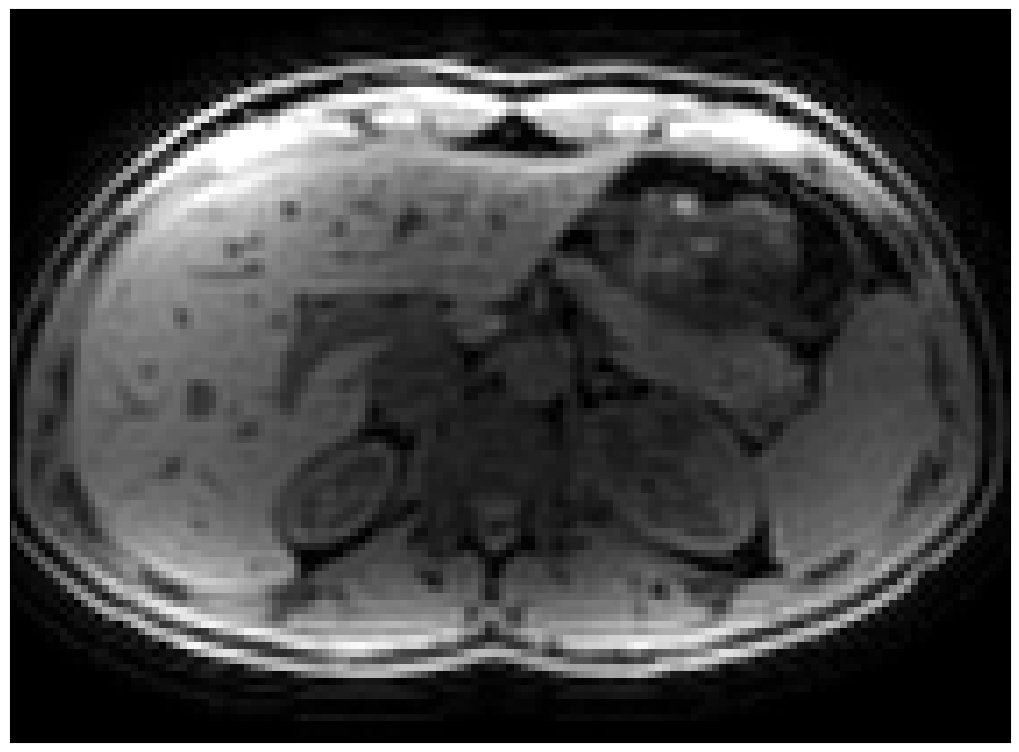

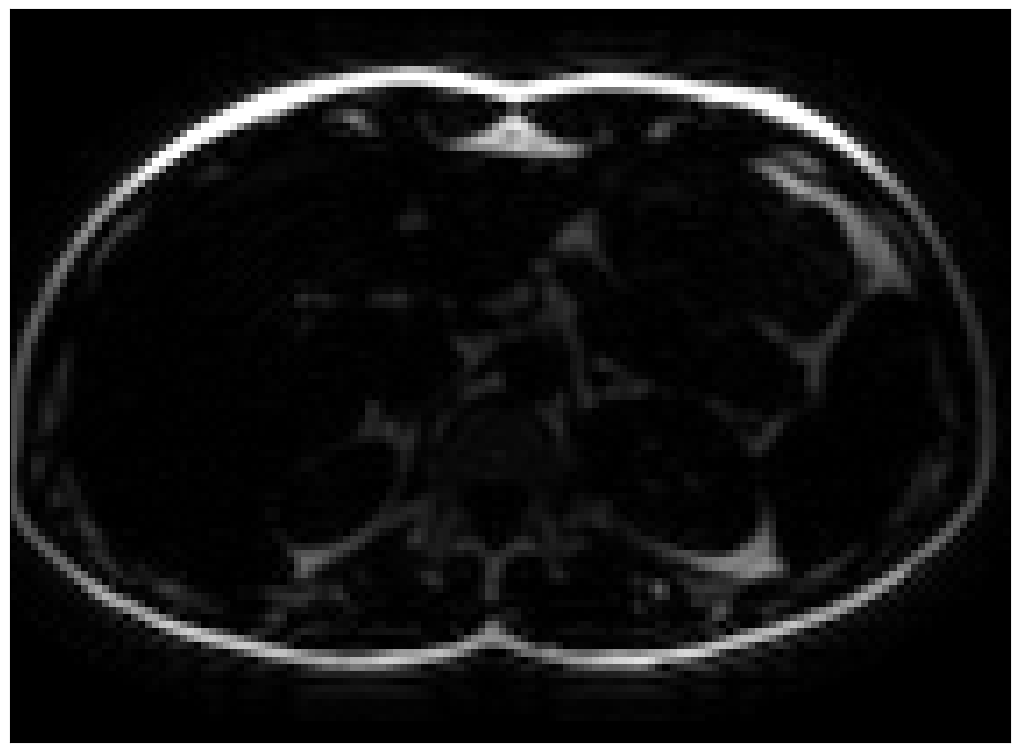

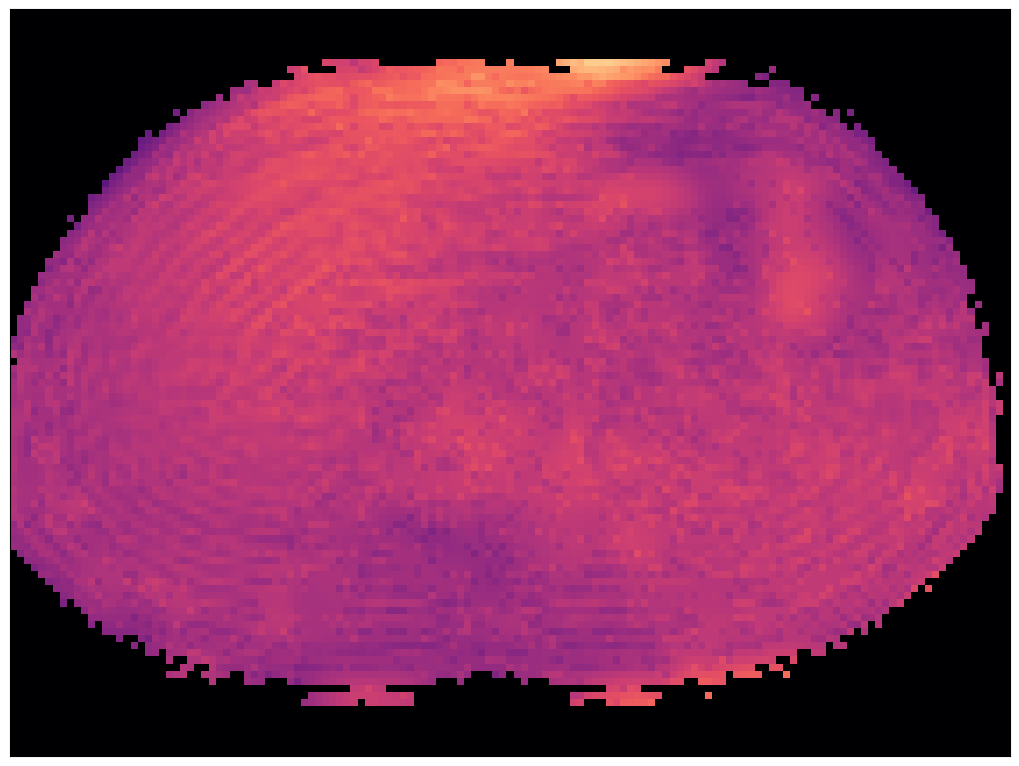

[]

In [7]:
tissueMask = np.abs(signal[:,:,:,0]) > 0.05 *np.max(np.abs(signal[:,:,:,0]))# binary mask with dim (nx, ny, nz)
# Fill mask
filledMask = np.zeros_like(tissueMask)
filledMask2 = np.zeros_like(tissueMask)
for ie in range(0, tissueMask.shape[-1]):
    filledMask[:, :, ie] = binary_fill_holes(tissueMask[:, :, ie])
tissueMask = np.abs(signal[:,:,:,0]) > 0.015 *np.max(np.abs(signal[:,:,:,0]))# binary mask with dim (nx, ny, nz)
for ie in range(0, tissueMask.shape[0]):
    filledMask2[ie, :, :] = binary_fill_holes(tissueMask[ie,:, :])
window_fieldmap = [-300, 300]
fieldmap = copy.deepcopy(g.fieldmap)
fieldmap[~filledMask] = window_fieldmap[0] 
fieldmap2 = copy.deepcopy(g.fieldmap)
fieldmap2[~filledMask2] = window_fieldmap[0] 

position_3d = np.array([2, 0, 40])
plot_images(np.abs(g.images["water"]), cmap_img_type["water"], ['axial'], params['voxelSize_mm'], position_3d, None, filename="water_male", fig_name="invivo")
plot_images(np.abs(g.images["fat"]), cmap_img_type["fat"], ['axial'], params['voxelSize_mm'], position_3d, None, filename="fat_male", fig_name="invivo")
plot_images(fieldmap, cmap_img_type["fieldmap"], ['axial'], params['voxelSize_mm'], position_3d, window_fieldmap, filename="fieldmap_male", fig_name="invivo")

Dual-echo method: single-res
1/3: Phasors... done! (0.01s)
2/3: Phasormap... 

/home/jstelter/2echo-WaterFat-hmrGC/hmrGC_dualEcho/dual_echo.py:209: RuntimeWarning: invalid value encountered in divide
  phasors_masked = phasors_masked / xp.abs(phasors_masked)


done! (1.07s)
3/3: Images... done! (0.0s)
CPU times: user 1.05 s, sys: 64.2 ms, total: 1.11 s
Wall time: 1.1 s


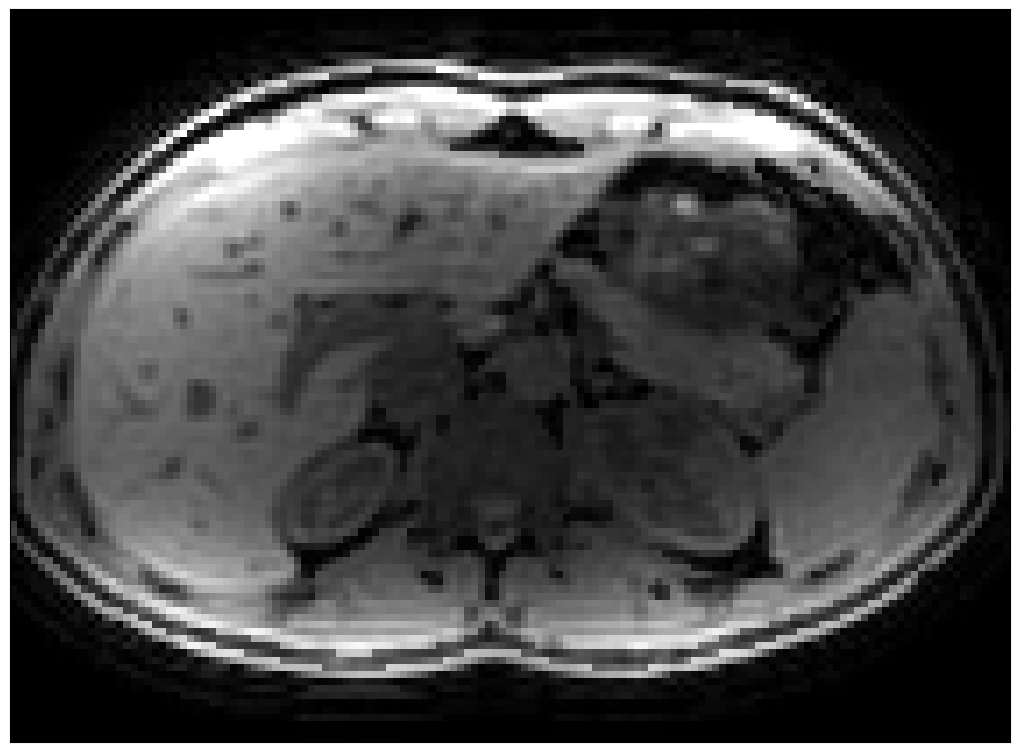

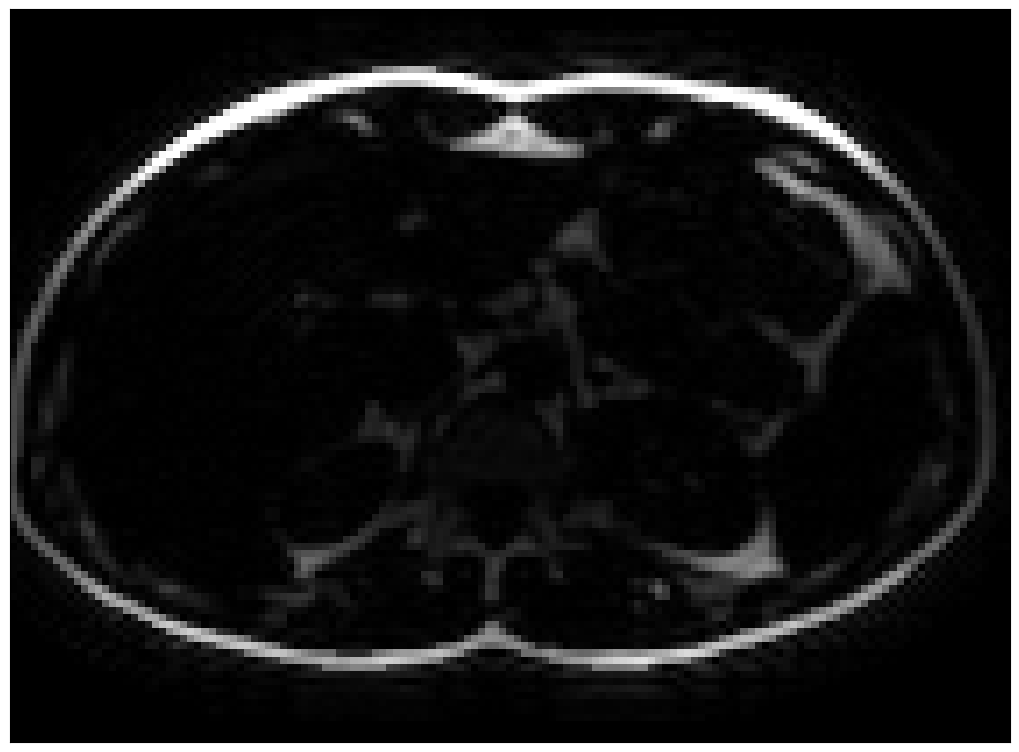

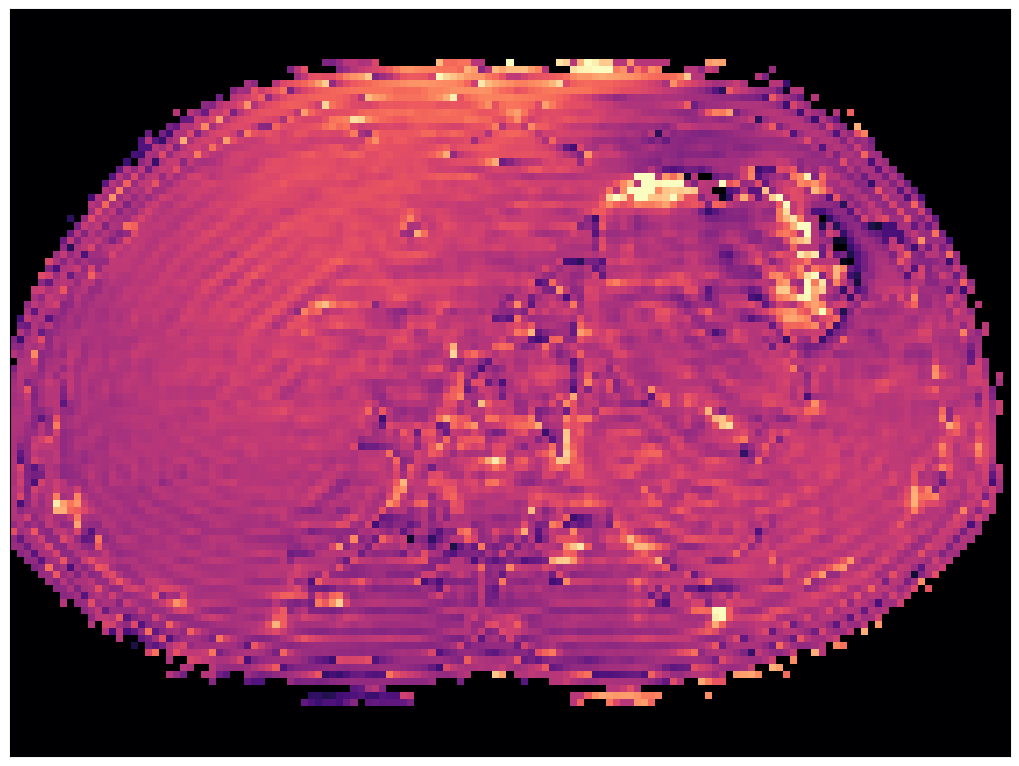

[]

In [8]:
# Perform graph-cut method
%time g.perform("single-res")

tissueMask = np.abs(signal[:,:,:,0]) > 0.05 *np.max(np.abs(signal[:,:,:,0]))# binary mask with dim (nx, ny, nz)
# Fill mask
filledMask = np.zeros_like(tissueMask)
filledMask2 = np.zeros_like(tissueMask)
for ie in range(0, tissueMask.shape[-1]):
    filledMask[:, :, ie] = binary_fill_holes(tissueMask[:, :, ie])
tissueMask = np.abs(signal[:,:,:,0]) > 0.015 *np.max(np.abs(signal[:,:,:,0]))# binary mask with dim (nx, ny, nz)
for ie in range(0, tissueMask.shape[0]):
    filledMask2[ie, :, :] = binary_fill_holes(tissueMask[ie,:, :])
window_fieldmap = [-300, 300]
fieldmap = copy.deepcopy(g.fieldmap)
fieldmap[~filledMask] = window_fieldmap[0] 
fieldmap2 = copy.deepcopy(g.fieldmap)
fieldmap2[~filledMask2] = window_fieldmap[0] 

position_3d = np.array([2, 0, 40])
plot_images(np.abs(g.images["water"]), cmap_img_type["water"], ['axial'], params['voxelSize_mm'], position_3d, None, filename="water_male", fig_name="invivo_singleres")
plot_images(np.abs(g.images["fat"]), cmap_img_type["fat"], ['axial'], params['voxelSize_mm'], position_3d, None, filename="fat_male", fig_name="invivo_singleres")
plot_images(fieldmap, cmap_img_type["fieldmap"], ['axial'], params['voxelSize_mm'], position_3d, window_fieldmap, filename="fieldmap_male", fig_name="invivo_singleres")